In [ ]:
# Load and preview the dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/train.csv')

# Display basic info and first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (15120, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


Missing values per column:
 Series([], dtype: int64)


/tmp/ipython-input-4246853087.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cover_Type', data=df, palette='viridis')


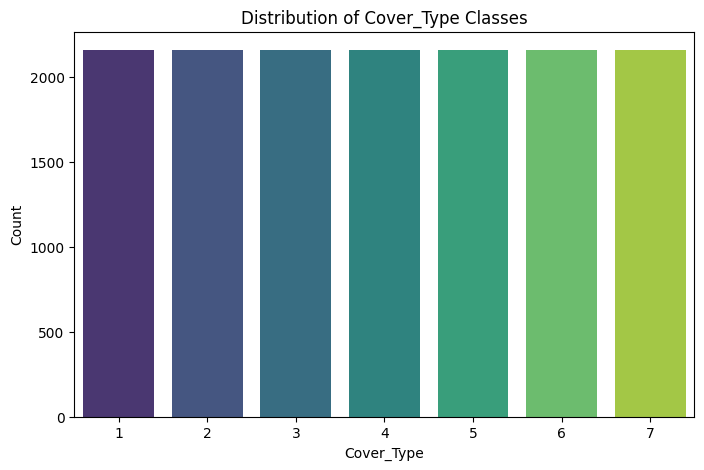

In [ ]:
# Check for missing values and target class distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])

# Plot target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Cover_Type', data=df, palette='viridis')
plt.title('Distribution of Cover_Type Classes')
plt.xlabel('Cover_Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Separate features and target, and split into train/test sets
from sklearn.model_selection import train_test_split

# Drop 'Id' column if it's just an identifier
X = df.drop(columns=['Id', 'Cover_Type'])
y = df['Cover_Type']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (12096, 54)
Test set shape: (3024, 54)


In [ ]:
# Train a baseline Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8551587301587301

Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.77      0.77       432
           2       0.78      0.65      0.71       432
           3       0.83      0.81      0.82       432
           4       0.93      0.97      0.95       432
           5       0.88      0.94      0.91       432
           6       0.83      0.88      0.85       432
           7       0.94      0.97      0.95       432

    accuracy                           0.86      3024
   macro avg       0.85      0.86      0.85      3024
weighted avg       0.85      0.86      0.85      3024



/tmp/ipython-input-1643136865.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=np.array(feature_names)[indices][:15], palette='mako')


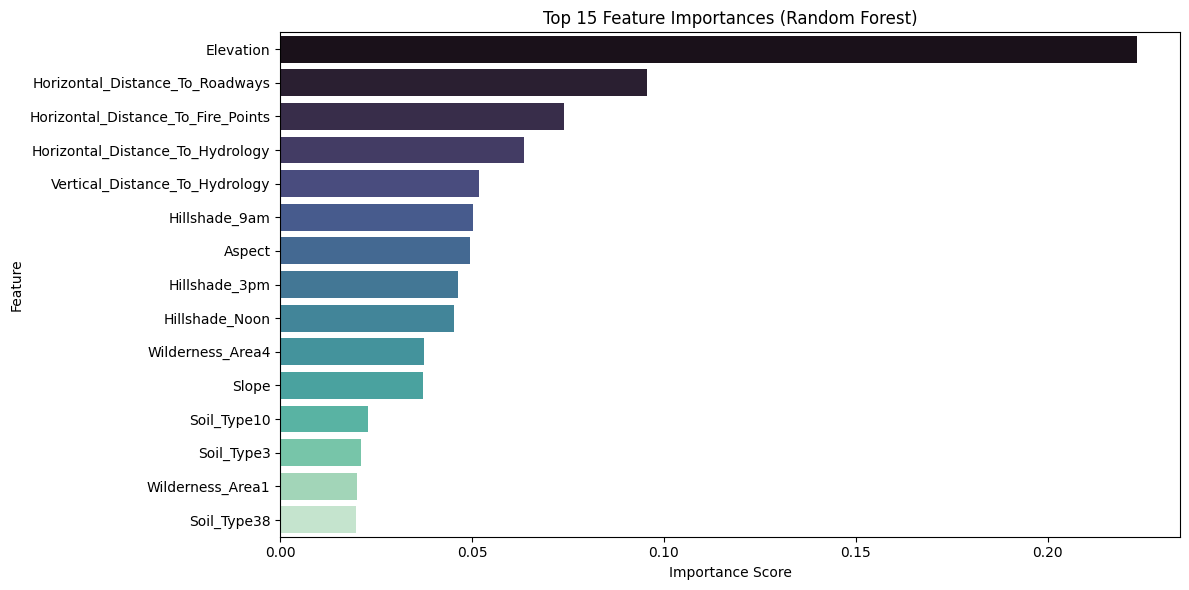

In [ ]:
# Plot feature importance from Random Forest
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:15], y=np.array(feature_names)[indices][:15], palette='mako')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Remap y labels from 1–7 to 0–6 for compatibility with XGBoost
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

# Train XGBoost with remapped labels
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_xgb)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test_xgb, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:24:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.853505291005291

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76       432
           1       0.75      0.63      0.69       432
           2       0.83      0.82      0.83       432
           3       0.96      0.97      0.97       432
           4       0.87      0.95      0.91       432
           5       0.82      0.88      0.85       432
           6       0.94      0.98      0.96       432

    accuracy                           0.85      3024
   macro avg       0.85      0.85      0.85      3024
weighted avg       0.85      0.85      0.85      3024



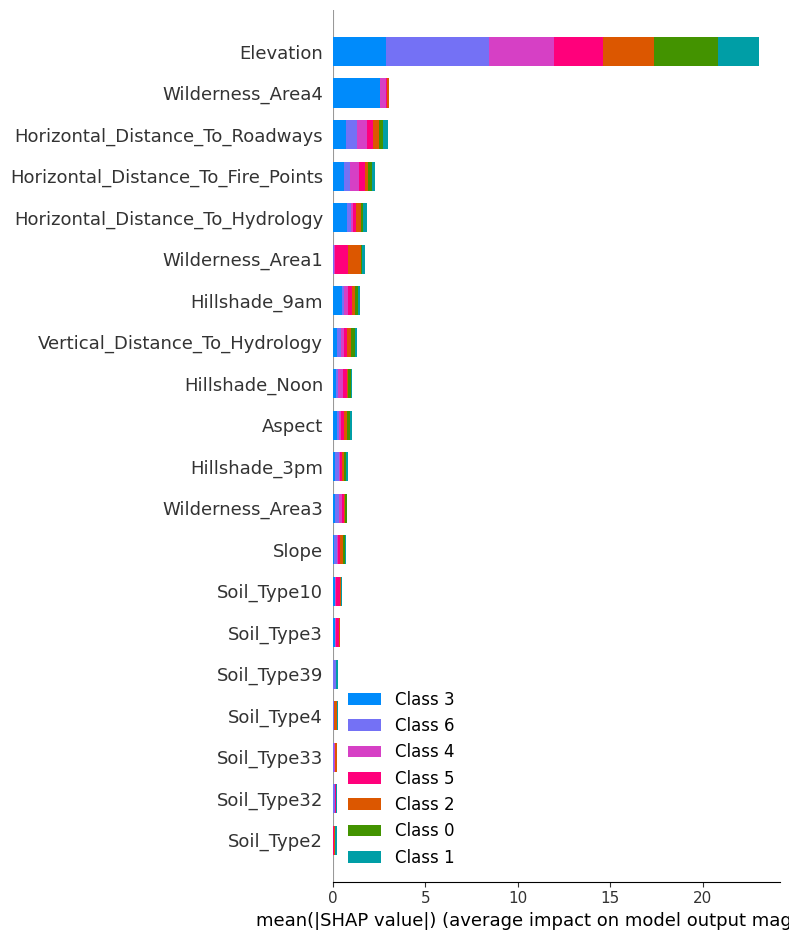

In [ ]:
# SHAP analysis for XGBoost model
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot for global feature impact
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
# Train LightGBM classifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lgb = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("\nLightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 44
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
LightGBM Accuracy: 0.8564814814814815

LightGBM Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.75      0.77       432
           2       0.76      0.65      0.70       432
           3       0.83      0.82 

In [ ]:
# Compare model accuracies
model_scores = {
    "Random Forest": accuracy_score(y_test, rf_model.predict(X_test)),
    "XGBoost": accuracy_score(y_test_xgb, xgb_model.predict(X_test)),
    "LightGBM": accuracy_score(y_test, lgb_model.predict(X_test))
}

for model, score in model_scores.items():
    print(f"{model} Accuracy: {score:.4f}")

Random Forest Accuracy: 0.8552
XGBoost Accuracy: 0.8535
LightGBM Accuracy: 0.8565


In [ ]:
# Fine-tune LightGBM with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 200]
}

# Initialize model
lgb_estimator = lgb.LGBMClassifier(random_state=42)

# Grid search with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=lgb_estimator,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 44
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
Best Parameters: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'num_leaves': 50}
Best CV Accuracy: 0.8558201058201057


In [ ]:
# Retrain LightGBM with best parameters
best_lgb_model = lgb.LGBMClassifier(
    learning_rate=0.1,
    max_depth=20,
    n_estimators=200,
    num_leaves=50,
    random_state=42
)

best_lgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_best = best_lgb_model.predict(X_test)
print("Tuned LightGBM Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nTuned LightGBM Classification Report:\n", classification_report(y_test, y_pred_best))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 44
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
Tuned LightGBM Accuracy: 0.8687169312169312

Tuned LightGBM Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.76      0.78       432
           2       0.77      0.68      0.72       432
           3       0.85      0.83      0.84       432
           4       0.96      0.9

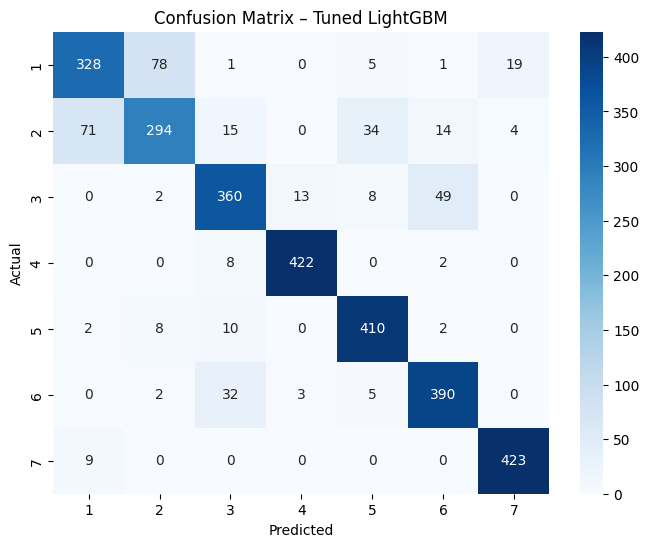

In [ ]:
# Plot confusion matrix for tuned LightGBM
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title('Confusion Matrix – Tuned LightGBM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()